Подключаем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import scipy.stats as stats

Выполним первый этап, получим исходные данные и изучим их

In [2]:
df_hypothesis = pd.read_csv('C:\\Users\\Anore\\Project sprints\\ANALYTICS\\ABtest\\hypothesis.csv')
display(df_hypothesis.head(10))
df_hypothesis.info()
df_hypothesis.duplicated().sum()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


0

Приведем название столбцов к корректному виду

In [3]:
df_hypothesis = df_hypothesis.rename(columns = {
    'Hypothesis': 'hypothesis',
    'Reach': 'reach',
    'Impact': 'impact',
    'Confidence': 'confidence',
    'Efforts': 'efforts',
})

In [4]:
df_orders = pd.read_csv('C:\\Users\\Anore\\Project sprints\\ANALYTICS\\ABtest\\orders.csv')
display(df_orders.head(10))
df_orders.info()
df_orders.duplicated().sum()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


0

In [5]:
#Изменим тип данных времени
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [6]:
df_visitors = pd.read_csv('C:\\Users\\Anore\\Project sprints\\ANALYTICS\\ABtest\\visitors.csv')
display(df_visitors)
df_visitors.info()
df_visitors.duplicated().sum()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


0

In [7]:
#Изменим тип данных времени
df_visitors['date'] = pd.to_datetime(df_visitors['date'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Вывод:
Данные чисты и корректны, дубликатов нет. Необходимо было изменить лишь тип данных у столбцов с датами. Это изменение нужно для корректного отображения даты при построении графиков.

Выполним расчеты по ICE и RICE score

Применяем фреймворк ICE

In [8]:
df_hypothesis['ice'] = (df_hypothesis['impact'] * df_hypothesis['confidence']) / df_hypothesis['efforts']
display(round(df_hypothesis[['hypothesis', 'ice']].sort_values('ice', ascending=False), 3))


,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200
0,"Добавить два новых канала привлечения трафика,...",13.333
7,Добавить форму подписки на все основные страни...,11.200
6,Показать на главной странице баннеры с актуаль...,8.000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000
1,"Запустить собственную службу доставки, что сок...",2.000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333
3,"Изменить структура категорий, что увеличит кон...",1.125
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000


Применяем фреймворк RICE

In [9]:
df_hypothesis['rice'] = (df_hypothesis['reach'] * df_hypothesis['impact'] * df_hypothesis['confidence']) / df_hypothesis['efforts']
display(round(df_hypothesis[['hypothesis', 'rice']].sort_values('rice', ascending=False), 3))


,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Сравнив результаты обоих исследований можно сделать следующие выводы:
Гипотезы 1, 3, 5 и 4 в обоих случаях занимают нижние строчки, образуя тем самым блок с низким приоритетом.
В тройку лидеров входят гипотезы 0 и 7
Гипотезы 0, 7 и 8 в результатах RICE заняли строчки выше, а лидирующая 8 заняла пятую позицию
Только гипотезы 4 и 6 не изменили свою позицию

АНАЛИЗ A/B ТЕСТА

Получим объединенный датафрейм для дальнейших исследований

In [10]:
datesGroups = df_orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: df_orders
                                     [np.logical_and(df_orders['date'] <= x['date'], 
                                                     df_orders['group'] == x['group'])].agg({'date' : 'max', 
                                                                                             'group' : 'max', 
                                                                                             'transactionId' : 'nunique', 
                                                                                             'visitorId' : 'nunique', 
                                                                                             'revenue' : 'sum'}), 
                                                                                        axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: df_visitors
                                       [np.logical_and(df_visitors['date'] <= x['date'], 
                                                       df_visitors['group'] == x['group'])].agg({'date' : 'max', 
                                                                                                 'group' : 'max', 
                                                                                                 'visitors' : 'sum'}), 
                                                                                        axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Построим график кумулятивной выручки по группам

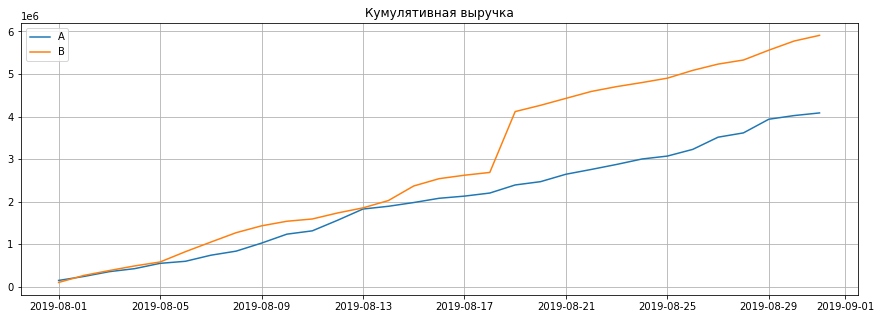

In [34]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка')
plt.grid()
plt.legend()
plt.show()

Оба графика постепенно растут. Наблюдается резкий скачок у группы B, скорее всего на ту дату были произведены заказы на крупную сумму или один заказ.

Чтож посмотрим более детально что произошло в ту дату

In [12]:
df_orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A
463,4170537404,290022471,2019-08-19,16480,B
531,4016435970,4017075195,2019-08-19,13390,A


Посмотрим так же количество заказов в эту дату

In [13]:
df_orders.query(' date == "2019-08-19" ').groupby('visitorId').agg({'transactionId': 'nunique'}).sort_values(by='transactionId', ascending=False).head(10)

,transactionId
visitorId,
2397843657,2
154576532,1
3017378493,1
2744017357,1
2758621772,1
2763027084,1
2776274025,1
2837914161,1
2912540959,1


Теперь видно, что резкий скачаок произошел из-за одного заказа на сумму в 1294500, по сравнению с остальными заказами он в несколько десятков раз больше. 

Построим график кумулятивного среднего чека по группам.

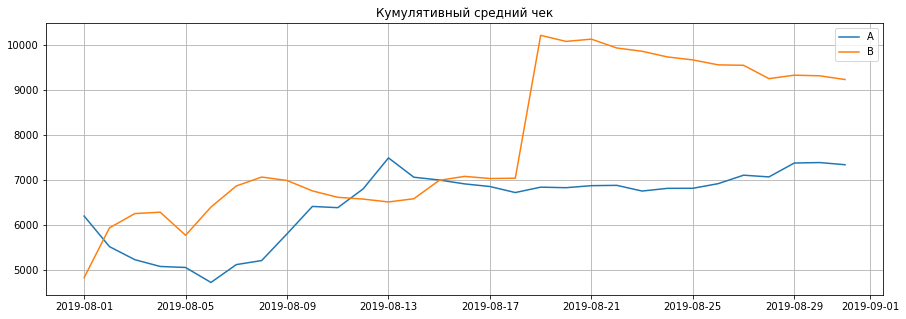

In [14]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек')
plt.grid()
plt.legend()
plt.show()

Показатели группы A более стабильны, сперва заказов немного, затем наблюдается рост до 7500, далее график имеет колебания лишь в пределах 500-ста единиц. 
В первой половине показатели группы В выше чем у А, только в первый день и с 12-15 августа преимущество за группой А.
Далее 19 августа происходит резкий скачок опять же из-за того самого заказа № 425 из предыдущего исследования кумулятивной выручки. После 19-го числа оба графика стабильны, при том группа В медленно уменьшается, а результаты группы А увеличиваются.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

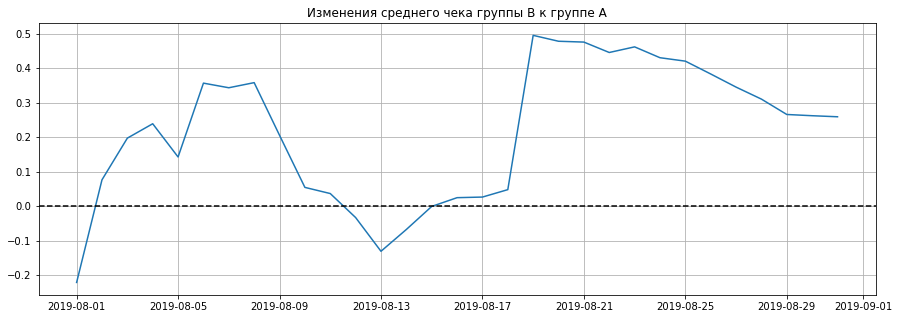

In [35]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Изменения среднего чека группы В к группе А')
plt.grid()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Примерно до середины периода наблюдается около 7 резких скачков, что явно свидетельствует о наличии заказов на крупную сумму.

Построим график кумулятивной конверсии по группам.

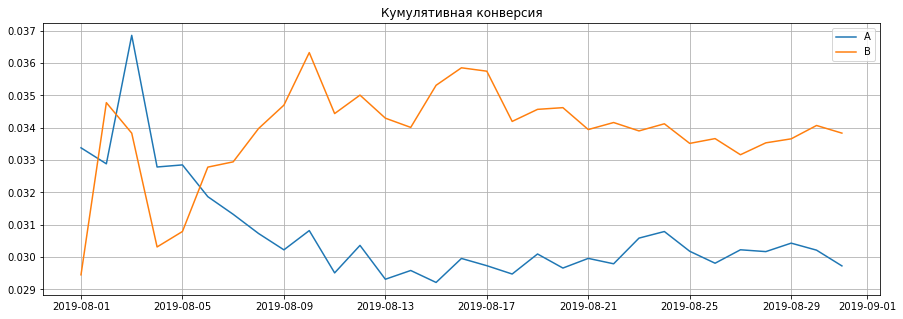

In [36]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия')
plt.grid()
plt.legend()
plt.show()

С начала месяца конверсия 1-5 августа конверсия "A" была значительно больше, даже 3 августа она была максимальной за весь период наблюдения между группами (исключение 2 августа); и после пика она пошла сильно падать, а начиная с 9 августа стагнировала на в минимальном диапазоне 0,029-0,031. Конверсия группы "B" с 4 августа пошла расти и уже 6 августа превысила конверсию "A" и росла до 10 августа чуть выше 0,036; затем пошло постепенное снижение, с имевшем место всплеском роста конверсии 15-17 августа до чуть ниже 0,036. Можно сделать вывод - конверсия группы "B" в целом значительно больше "A" (начиная с 6 августа стабильно конверсия "B" больше A"").

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

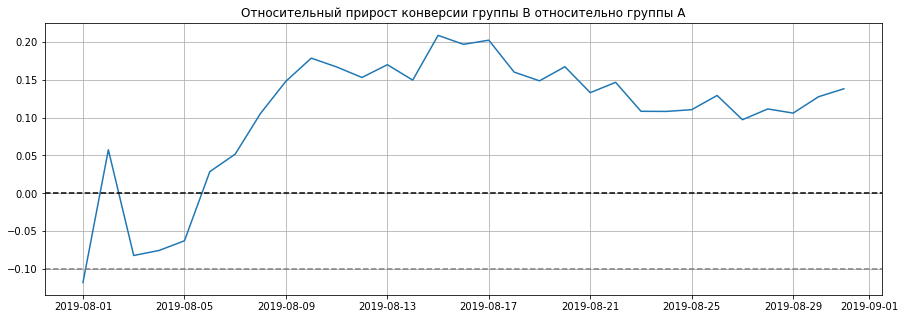

In [37]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

С 1 авгста по 5 - несколько дней когда конверсия в "A" была больше на 5-10%; но исключение в этот период это 2 августа - был сильный рост конверсии в группе "B" и по итогу дня результат "B" был на 5% больше "A" (надо отметить, что 2 августа был сильный рост конверсий в обоих группах, не иначе как маркетинговая акция была или скидки ...и т.д.). Начиная с 6 августа группа "B" лидировала до конца периода; её конверсия росла до 15 августа и разница с "A" на максимуме составила 21%, затем пошло постепенное снижение отностельной конверсии до 10%-14%.

Построим точечный график количества заказов по пользователям.

In [18]:
print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors  conversion
0 2019-08-01     A      24      20   148579       719    0.033380
1 2019-08-01     B      21      20   101217       713    0.029453
2 2019-08-02     A      44      38   242401      1338    0.032885
3 2019-08-02     B      45      43   266748      1294    0.034776
4 2019-08-03     A      68      62   354874      1845    0.036856


In [19]:
ordersByUsers = df_orders[['transactionId', 'visitorId']].groupby(by='visitorId', 
                            as_index=False).agg({'transactionId': 'nunique'}).sort_values(by='transactionId', ascending=False)
ordersByUsers.columns=('user_id', 'orders')
print(ordersByUsers.head(10))

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


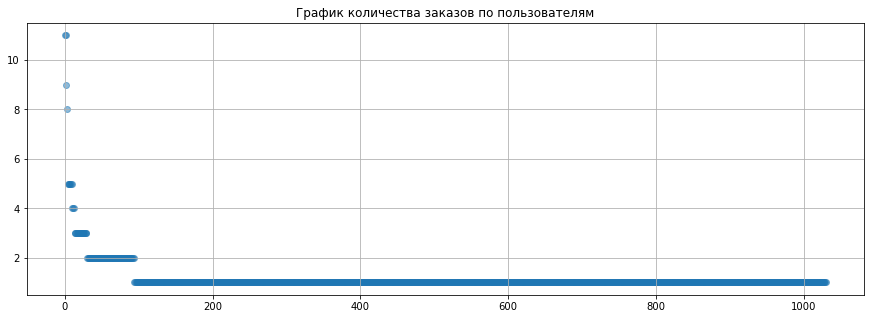

In [38]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5)
plt.show()

Больше всего пользователей которые совершили 1 заказ. Тех кто совершили 2 заказа уже не так много. И уже те кто совершил 3 заказа совсем мало, и считать ли это выбросами пока не ясно, - надо посчитать процентили (95 и 99). А все что выше 3 заказов - явно уже аномалия.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [21]:
print(np.percentile(ordersByUsers['orders'], [95,96,97,98, 99])) 

[2. 2. 2. 3. 4.]


97% всех пользователей совершают 1-2 заказа. Это высокий процент потому все что более 2-ух заказов будем считать аномалией

Построим точечный график стоимостей заказов.

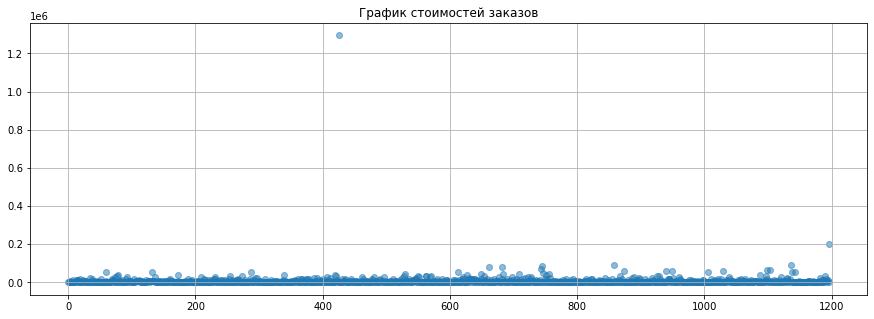

In [22]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, df_orders['revenue'], alpha=0.5);

В графике присутствуют выбросы которые делают масштаб более мелким, что не позволяет более подробно оценить данные.
Избавимся от выбрососв(2 штуки) и возьмем только те значения где результат равен менее 195000

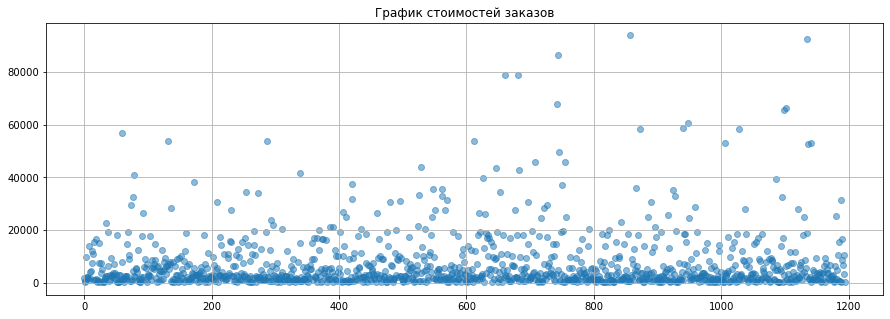

In [23]:
true_orders = df_orders[df_orders['revenue'] <= 195000]['revenue']
x_values = pd.Series(range(0,len(true_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, true_orders, alpha=0.5);

В целом все заказы на сумму не более 100000. Чтобы установить более точные границы рассчитаем процентили

Посчитаем 95-й и 99-й перцентили стоимости заказов и определим границу для аномальных заказов

In [24]:
print(np.percentile(df_orders['revenue'], [95,96,97,98, 99])) 

[28000.  31382.  35485.  44133.2 58233.2]


99% менее 58233.2 именно ее и установим за разделяющую границу.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [25]:
display(df_orders.head())
display(df_visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [26]:
visitorsADaily = df_visitors[df_visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = df_visitors[df_visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = df_orders[df_orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = df_orders[df_orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим все в одну таблицу

In [27]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
display(data.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть(двухсторонняя теория).

In [28]:
ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =", 0.05)
print("p-value =", round(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1], 3))
print("Относительный показатель 'B' и 'A' =", round(sampleB.mean() / sampleA.mean() - 1, 3)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


Вывод: p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 13.8% .

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов (пороговое значение возьмём равное 5%). И найдём относительные различия в среднем чеке между группами.

За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть(так же двухсторонняя гипотеза).

In [29]:
print("alpha =",0.05)
print("p-value =", round(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1], 3))
print("Относительный показатель 'B' и 'A' =", round(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1, 3)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть средние чеки по "сырым" данным схожи. И при этом, средний чек группы B значительно выше среднего чека группы A (на ~26% !).

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Проведем анализ по данным которые отбросили:
Пользователи которые совершиил 3 и более заказов (usersWithManyOrders)
Пользователи совершившие заказы на сумму более 58233.2 (usersWithExpensiveOrders)
Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape().

In [30]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,len(abnormalUsers))

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
Всего аномальных пользователей = 31


Теперь увидим разницу между "сырыми" данными и "очищенными". Расчитаем статистическую значимость между группами по "очищенным" данным. Сперва подготовим выборку по пользователям и по группам теста

In [31]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0)

К полученным выборкам применим непараметрический тест Уилкоксона-Манна-Уитни
За нулевую гипотезу будет взята версия что: статистической значимость между группами теста по очищенным данным нет
Тогда альтернативная гипотеза будет звучать так: статистическая значимость между группами теста по очищенным данным есть
(двухсторонняя теория)

In [32]:
print("alpha =",0.05)
print("p-value =", round(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1], 3))
print("Относительный показатель 'B' и 'A' =", round(sampleBFiltered.mean()/sampleAFiltered.mean()-1, 3)) 

alpha = 0.05
p-value = 0.01
Относительный показатель 'B' и 'A' = 0.174


Вывод: p-value = 0.01 меньше 0.05. Нулевую гипотезу отвергаем. Значит здесть так же различия в конверсии между группами по "очищенным" данным есть. Преимущество группы "B" над "A" равен 17,4% (в то время как по "отфильтрованным" данным 13.8%).

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

H0 = различий в статистической значимости в среднем чеке между группами по "очищенным" данным нет
H1 = есть различия в статистической значимости в среднем чеке между группами по "очищенным" данным

In [33]:
print("alpha =",0.05)
print("p-value =", round(stats.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1], 3))

print("Относительный показатель 'B' и 'A' =", round(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1, 3)) 

alpha = 0.05
p-value = 0.798
Относительный показатель 'B' и 'A' = -0.02


P-value значительно больше 0.05. Нулевая гипотеза верна и причин считать различия между между группами в серднем чеке по "очищенным данным" нет. А вот средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше аж на ~26%, - и всё это из-за одного аномального заказа №425 на 1,3 млн.

РЕШЕНИЕ ПО РЕЗУЛЬТАТАМ ТЕСТА

И по "сырым" и по "очищенным" данным различия в конверсии групп A и B есть. Относительный выигрыш группы "B" над "A" равен 17,4% по "очищенным" и 13.8% по "сырым" данным.

Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше на ~26%, только из-за одного того заказа на крупную сумму.

Итог теста: безоговорочная победа группы B, ее конверсия значительно выше чем у группы A. Хотя их средние чеки примерно равны.